# Data Loading and Processing

In [ ]:
# import packages and load data

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

data = pd.read_csv('/content/drive/MyDrive/CS 4774/ML4VA/cpd_incidents.csv')

crime = pd.DataFrame(data)
print(crime.describe())

Mounted at /content/drive/


<ipython-input-1-8991f61ab23a>:9: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/CS 4774/ML4VA/cpd_incidents.csv')


         IncidentID   BlockNumber  HourReported      Latitude     Longitude
count  3.293000e+04  31201.000000  32930.000000  31445.000000  31445.000000
mean   2.020019e+11    868.609980   1340.871728     38.033211    -78.488009
std    2.006888e+08    647.458954    600.198327      0.015235      0.029229
min    2.010001e+11      0.000000      0.000000     36.871740    -82.777440
25%    2.018000e+11    400.000000    954.000000     38.025054    -78.497208
50%    2.020000e+11    700.000000   1402.000000     38.030767    -78.487975
75%    2.022000e+11   1200.000000   1811.000000     38.037753    -78.479103
max    2.023800e+11   9900.000000   2359.000000     38.755280    -77.470735


In [ ]:
crime.head()

,Offense,IncidentID,IncidentUniqueID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,InputLocation,OutputLocation,Latitude,Longitude,CenterOfPop,ZipCode,IncidentCategory
0,Lost/FoundProperty,202200013375,20220001337522902,400.0,"GARRETT ST, D",CPD,05/18/2022,1926,"Arreguin, Arron","400 GARRETT ST, D, Charlottesville, Virginia","400 Garrett St, Apt D, Charlottesville, Virgin...",38.028042,-78.481577,False,22902,Property
1,Hit and Run,202200013382,20220001338222902,NaN,E MARKET ST @ 9TH ST,CPD,05/19/2022,2033,"Lowry, Ryan","E MARKET ST @ 9TH ST, Charlottesville, Virginia","E Market St & 9th St NE, Charlottesville, Virg...",38.029620,-78.475300,False,22902,Traffic
2,Vandalism,202200012852,20220001285222902,400.0,"GARRETT ST, D",CPD,05/14/2022,1728,"Via, Ryan","400 GARRETT ST, D, Charlottesville, Virginia","400 Garrett St, Apt D, Charlottesville, Virgin...",38.028042,-78.481577,False,22902,Vandalism/Damage Property
3,Runaway,202200013129,20220001312922903,700.0,"PROSPECT AVE, E",CPD,05/16/2022,1826,"Stein, Nathan","700 PROSPECT AVE, E, Charlottesville, Virginia","700 Prospect Ave, Charlottesville, Virginia, 2...",38.024632,-78.494432,False,22903,Abduction/Missing Person
4,Pornography,202200013209,20220001320922902,300.0,CARLTON RD,CPD,05/17/2022,1201,"Bowers, Justin","300 CARLTON RD, Charlottesville, Virginia","300 Carlton Rd, Charlottesville, Virginia, 22902",38.022391,-78.469948,False,22902,Sex Offenses


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32930 entries, 0 to 32929
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Offense           32930 non-null  object 
 1   IncidentID        32930 non-null  int64  
 2   IncidentUniqueID  32930 non-null  object 
 3   BlockNumber       31201 non-null  float64
 4   StreetName        32929 non-null  object 
 5   Agency            32930 non-null  object 
 6   DateReported      32930 non-null  object 
 7   HourReported      32930 non-null  int64  
 8   ReportingOfficer  32885 non-null  object 
 9   InputLocation     32809 non-null  object 
 10  OutputLocation    31445 non-null  object 
 11  Latitude          31445 non-null  float64
 12  Longitude         31445 non-null  float64
 13  CenterOfPop       31445 non-null  object 
 14  ZipCode           32792 non-null  object 
 15  IncidentCategory  32930 non-null  object 
dtypes: float64(3), int64(2), object(11)
memo

In [ ]:
crime['Offense'].value_counts()

Hit and Run                   2739
Assault Simple                2630
Suspicious Activity           2140
Vandalism                     2088
Larceny - All Other           1982
                              ... 
911 Investigation                1
Traffic - Disabled Vehicle       1
Field Interview                  1
Alarm-Accidental                 1
Fire Code Violation              1
Name: Offense, Length: 121, dtype: int64

In [ ]:
# build list of all unique crimes for classification

all_crimes = pd.DataFrame(crime['Offense'].value_counts())
severity = dict()
for i in range(len(all_crimes)):
  s = str(all_crimes.iloc[i])
  severity[s[s.find(':')+2:s.find(',')]] = 0
  print(s[s.find(':')+2:s.find(',')])

Hit and Run
Assault Simple
Suspicious Activity
Vandalism
Larceny - All Other
Assist Citizen - Mental/TDO/ECO
Lost/FoundProperty
Larceny - From Motor Vehicle
Larceny - Theft from Building
Larceny - Shoplifitng
Burglary
Motor Vehicle Theft
Disorderly Conduct
Assault Aggravated
Drug/Narcotics Violation
Assault Intimidation
Larceny - Of Veh Parts/Access
Misc - Criminal Call
Fraud-false pretense
Driving Under the Influence
Towed Vehicle
Animal Complaint
Shots Fired/Illegal Hunting
Assist Agency - Other
Death Investigation - DOA
Domestic Disturbance
Fraud-credit card
Fraud-impersonation
Misc - Non-Criminal Call
Missing Person-juvenile
Harassment
Trespass
Drunkeness DIP
Warrant Service
Animal - Bite
Comm Relations Initiative - CRI
Traffic Stops
Assist Agency - Backup/Assist
Found/Recovered Property
Runaway
Weapons Violations
Fraud-wire fraud
Accident w/Injuries
Narcotics
Forgery/Counterfeiting
Sex Offense
Sex Offense - Forcible Rape
Missing Person-adult
Accident - w/out Injuries
Unauthorized 

In [ ]:
# clasifying severe crimes
more_severe = ["Hit and Run","Assault Simple","Drug/Narcotics Violation","Disorderly Conduct","Vandalism","Larceny - All Other","Larceny - From Motor Vehicle","Larceny - Theft from Building","Larceny - Shoplifitng","Burglary","Motor Vehicle Theft","Assault Aggravated","Larceny - Of Veh Parts/Access","Assault Intimidation","Shots Fired/Illegal Hunting","Death Investigation - DOA","Domestic Disturbance","Harassment","Weapons Violations","Narcotics","Sex Offense","Sex Offense - Forcible Rape","Drug Investigation","Sex Offense-forcible fondling","Robbery - Strong Arm","Robbery - Armed","Stolen Property Offenses","Pornography","Sex Offense - Forcible Sodomy","Larceny - Pocket Picking","Drug Equipment Violation","Kidnap/Abduction","Stalking","Larceny - Purse Snatching","Homicide-murder/non-negligent","Arson","Robbery/Conversion","Bomb Threat","Prowler - Peeping  Tom","Larceny - From Coin Oper Device","Impersonating a Police Officer","Sex Offense - Assault w/Object","Child Ab - Contr to Delinquency","Sex Offense-statutory rape","Traffic - Traffic Hazard","Solicitation illegal w/o permit","Alarm - True","Homicide-negligent manslaughter","Prostitution-assisting/promoting","Prostitution"]
severe_crimes = set()
for item in more_severe:
  severity[item] = 1
  severe_crimes.add(item)

In [ ]:
crime['IncidentCategory'].value_counts()

Larceny                           6930
Other                             4210
Traffic                           3479
Assault                           3286
Intimidation                      3063
Vandalism/Damage Property         2097
Property                          2012
Drugs And Alcohol                 1509
Fraud                             1369
Disorderly Conduct                 820
Burglary                           702
Animal                             595
Abduction/Missing Person           550
Weapons                            543
Sex Offenses                       434
Death, Natural Or Undetermined     344
Accident                           277
Trespassing                        255
Robbery                            168
Service                             94
Embezzlement                        71
Suicide or Attempted                30
Welfare (Child)                     20
Arson                               14
Obstruction of Justice              12
Homicide                 

In [ ]:
# extract relevant features and isolate charlottesville
crime = crime[['Offense', 'DateReported', 'HourReported', 'Latitude', 'Longitude', 'IncidentCategory']]
crime = crime[crime['Longitude'] < -78.43]
crime = crime[crime['Longitude'] > -78.53]
crime = crime[crime['Latitude'] < 38.1]
crime = crime[crime['Latitude'] > 38]
crime.dropna(inplace=True)

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31345 entries, 0 to 32929
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Offense           31345 non-null  object 
 1   DateReported      31345 non-null  object 
 2   HourReported      31345 non-null  int64  
 3   Latitude          31345 non-null  float64
 4   Longitude         31345 non-null  float64
 5   IncidentCategory  31345 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
# data processing pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num = crime.select_dtypes(exclude='object')
cat = crime.select_dtypes(exclude='number')
num_attribs = list(num)
cat_attribs = list(cat)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
X = full_pipeline.fit_transform(crime)

# K Means

In [ ]:
# import packages for kmeans and hyperparameterization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


160099.64048617828
143249.62441475663
130185.19006687491
124895.49674135415
121011.8177482411
118109.61041024736
115501.50487301034
113562.01500714789
111635.80372616425


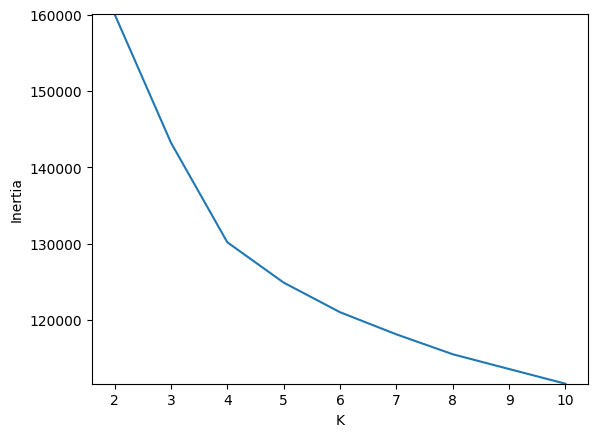

In [ ]:
# test different values for k, decide on optimal based on elbow rule
error = [0] * 9

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  error[k-2] = kmeans.inertia_
  print(kmeans.inertia_)

plt.plot(range(2, 11), error)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.ylim(min(error), max(error))
plt.show()

In [ ]:
# build optimal model with 4 clusters, add to df to allow for graphing
NUM_CLUSTERS = 4
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0)
kmeans.fit(X)

kmeans_model = crime
kmeans_model['Clusters'] = kmeans.fit_predict(X)
kmeans_model['Clusters'] = kmeans_model['Clusters'].astype("category")

In [ ]:
# import contextily for basemaps
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install contextily

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (8.2.1-1).
libproj-dev set to manually installed.
proj-data is already the newest version (8.2.1-1).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 154 kB of archives.
After this operation, 492 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 proj-bin amd64 8.2.1-1 [154 kB]
Fetched 154 kB in 1s (106 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state informatio

In [ ]:
# import graphing packages
import seaborn as sns
import contextily as cx
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# convert data to geodata
geometry = [Point(xy) for xy in zip(kmeans_model.Longitude, kmeans_model.Latitude)]
geodata = kmeans_model.drop(['Longitude', 'Latitude'], axis=1)
geodata = gpd.GeoDataFrame(geodata, crs="EPSG:4326", geometry=geometry)

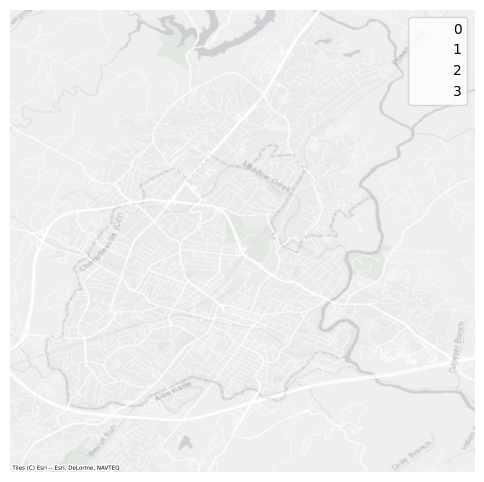

In [ ]:
# plain basemap
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_axis_off()
geodata.plot(ax=ax, column='Clusters', marker='o', markersize=10, alpha=0, legend=True)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Esri.WorldGrayCanvas, attribution_size=4)

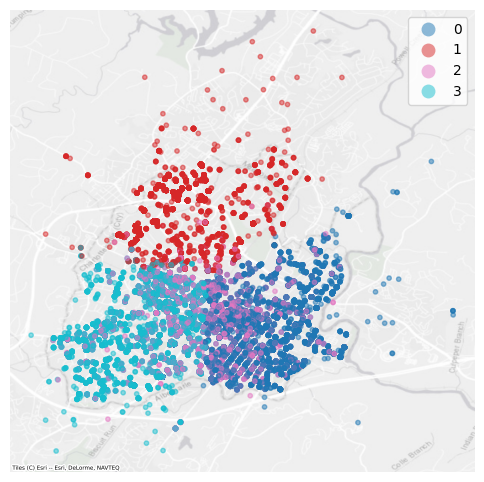

In [ ]:
# map of kmeans model
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_axis_off()
geodata.plot(ax=ax, column='Clusters', marker='o', markersize=10, alpha=0.5, legend=True)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Esri.WorldGrayCanvas, attribution_size=4)

In [ ]:
# printing value counts for incident category for each cluster
for i in range(NUM_CLUSTERS):
  print(f"Cluster {i}:")
  cluster = kmeans_model[kmeans_model['Clusters'] == i]
  print(cluster['IncidentCategory'].value_counts())
  print()

Cluster 0:
Larceny                           1820
Other                             1589
Assault                           1075
Intimidation                      1056
Traffic                            990
Property                           698
Vandalism/Damage Property          598
Fraud                              495
Drugs And Alcohol                  449
Disorderly Conduct                 289
Animal                             222
Abduction/Missing Person           164
Burglary                           161
Sex Offenses                       129
Death, Natural Or Undetermined     119
Weapons                            115
Accident                            81
Trespassing                         72
Robbery                             48
Service                             39
Embezzlement                        28
Welfare (Child)                      9
Obstruction of Justice               6
Suicide or Attempted                 6
Arson                                5
Death,        

In [ ]:
# printing the proportion of crimes that occur between 10 pm and 6 am
print("Proportion of Crimes Occuring at Night:\n")
for i in range(NUM_CLUSTERS):
  cluster = kmeans_model[kmeans_model['Clusters'] == i]
  print(f"Cluster {i}: {(len(cluster[cluster['HourReported'] < 600]) + len(cluster[cluster['HourReported'] >= 2200]))/len(cluster):.2f}")

Proportion of Crimes Occuring at Night:

Cluster 0: 0.11
Cluster 1: 0.15
Cluster 2: 0.49
Cluster 3: 0.10


In [ ]:
# printing the proportion of crimes that are more severe
print("Proportion of Severe Crimes:\n")
for i in range(NUM_CLUSTERS):
  cluster = kmeans_model[kmeans_model['Clusters'] == i]
  cluster['Severe'] = cluster['Offense'].map(severity)
  print(f"Cluster {i}: {sum(cluster['Severe'])/len(cluster):.2f}")

Proportion of Severe Crimes:

Cluster 0: 0.56
Cluster 1: 0.63
Cluster 2: 0.62
Cluster 3: 0.65


<ipython-input-22-c1c97891a2e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Severe'] = cluster['Offense'].map(severity)
<ipython-input-22-c1c97891a2e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Severe'] = cluster['Offense'].map(severity)
<ipython-input-22-c1c97891a2e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
# getting sse for each cluster

cluster_centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(NUM_CLUSTERS)]

clusterwise_sse = [0 for x in range(NUM_CLUSTERS)]
for point, label in zip(X, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

print(clusterwise_sse)

[41605.60367421644, 21826.284942584356, 29296.294436334145, 37457.00701374015]


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


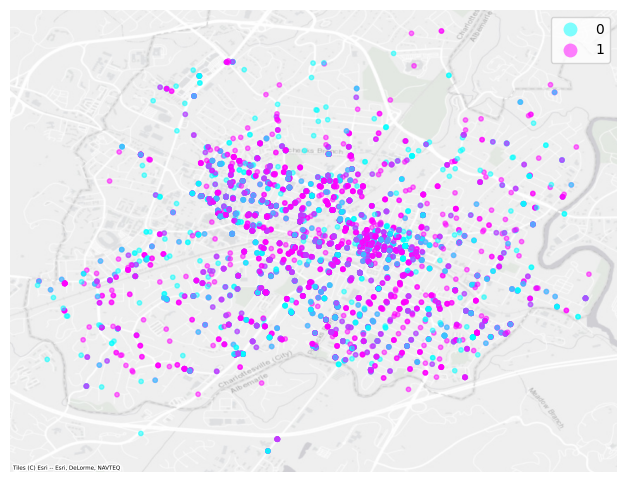

In [ ]:
# graph cluster 2
cluster = geodata[geodata['Clusters'] == 2]
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_axis_off()
cluster['Severe'] = cluster['Offense'].map(severity).astype("category")
cluster.plot(ax=ax, column='Severe', marker='o', markersize=10, alpha=0.5, legend=True, cmap='cool')
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Esri.WorldGrayCanvas, attribution_size=4)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


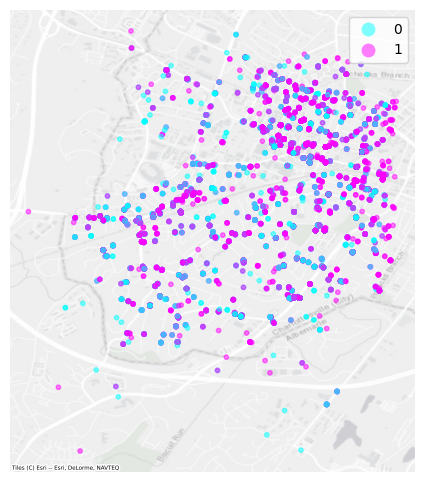

In [ ]:
# graph cluster 3
cluster = geodata[geodata['Clusters'] == 3]
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_axis_off()
cluster['Severe'] = cluster['Offense'].map(severity).astype("category")
cluster.plot(ax=ax, column='Severe', marker='o', markersize=10, alpha=0.5, legend=True, cmap='cool')
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Esri.WorldGrayCanvas, attribution_size=4)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# split features and labels
crime['Severe'] = crime['Offense'].map(severity).astype("category")
y = crime['Severe']
X = crime.drop(['DateReported', 'Severe', 'Offense', 'Clusters'], axis=1)

In [ ]:
# split data into test and train subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print(X_train.shape)
print(y_train.shape)
print(X_train)

(25076, 4)
(25076,)
       HourReported   Latitude  Longitude                IncidentCategory
29164          1907  38.025162 -78.464426                         Larceny
12919           934  38.023951 -78.483060                         Larceny
528            1126  38.018624 -78.471447                           Other
25598           826  38.030200 -78.491040                         Larceny
31419          1915  38.029223 -78.476537                         Assault
...             ...        ...        ...                             ...
5636           2225  38.032211 -78.463889  Death, Natural Or Undetermined
16162          1239  38.037491 -78.459647                         Larceny
4690           1937  38.051107 -78.502548                           Fraud
21508          1745  38.038918 -78.486804                    Intimidation
5993           1440  38.033338 -78.490246       Vandalism/Damage Property

[25076 rows x 4 columns]


In [ ]:
# build pipeline for random forest
forest_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), ['IncidentCategory']),
    ])

In [ ]:
X_train_prep = forest_pipeline.fit_transform(X_train)
X_test_prep = forest_pipeline.transform(X_test)

In [ ]:
# initial hyperparameterization
params = [{'n_estimators': [50, 100, 150], 'bootstrap': [True, False]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'n_estimators': [50, 100, 150]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 150}

In [ ]:
grid_search.best_score_

0.9363930475591633

In [ ]:
# further hyperparameterization
params = [{'n_estimators': [70, 90, 110, 130], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True],
                          'n_estimators': [70, 90, 110, 130]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 130}

In [ ]:
grid_search.best_score_

0.936049035943056

In [ ]:
# more hyperparameterization
params = [{'n_estimators': [60, 70, 80], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'n_estimators': [60, 70, 80]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 70}

In [ ]:
grid_search.best_score_

0.9356782689301124

In [ ]:
# final hyperparameteriation
params = [{'n_estimators': [65, 70, 75], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'n_estimators': [65, 70, 75]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 70}

In [ ]:
grid_search.best_score_

0.9356782689301124

In [ ]:
# building the model
clf = RandomForestClassifier(n_estimators=75, bootstrap=True, random_state=42)
clf.fit(X_train_prep, y_train)
pred = clf.predict(X_test_prep)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
for row in cm:
  print(row)
print()

# precision, recall, and f1
tn, fp, fn, tp = cm.ravel()
precision_score = tp / (tp + fp)
print(f"Precision: {precision_score}")
recall_score = tp / (tp + fn)
print(f"Recall: {recall_score}")
f1_score = (2 * precision_score * recall_score) / (precision_score + recall_score)
print(f"F1 Score: {f1_score}")

Confusion Matrix:
[2181  255]
[ 264 3569]

Precision: 0.93331589958159
Recall: 0.9311244456039656
F1 Score: 0.9322188846806844


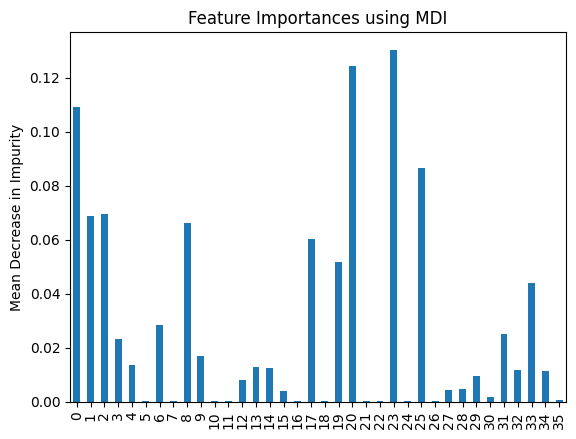

In [ ]:
# feature importances using median decrease in impurity

importances = clf.feature_importances_
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
plt.show()

# Random Forest Classifier w/out IncidentCategory

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# repeating with fewer features
crime['Severe'] = crime['Offense'].map(severity).astype("category")
y = crime['Severe']
X = crime.drop(['DateReported', 'Severe', 'Offense', 'Clusters', 'IncidentCategory'], axis=1)

In [ ]:
# splitting train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print(X_train.shape)
print(y_train.shape)
print(X_train)

(25076, 3)
(25076,)
       HourReported   Latitude  Longitude
29164          1907  38.025162 -78.464426
12919           934  38.023951 -78.483060
528            1126  38.018624 -78.471447
25598           826  38.030200 -78.491040
31419          1915  38.029223 -78.476537
...             ...        ...        ...
5636           2225  38.032211 -78.463889
16162          1239  38.037491 -78.459647
4690           1937  38.051107 -78.502548
21508          1745  38.038918 -78.486804
5993           1440  38.033338 -78.490246

[25076 rows x 3 columns]


In [ ]:
X_train_prep = num_pipeline.fit_transform(X_train)
X_test_prep = num_pipeline.transform(X_test)

In [ ]:
# hypermeterization
params = [{'n_estimators': [50, 100, 150], 'bootstrap': [True, False]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'n_estimators': [50, 100, 150]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 150}

In [ ]:
grid_search.best_score_

0.6704948951933194

In [ ]:
# hypermeterization
params = [{'n_estimators': [70, 90, 110, 130], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True],
                          'n_estimators': [70, 90, 110, 130]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 130}

In [ ]:
grid_search.best_score_

0.6717288464498171

In [ ]:
# hypermeterization
params = [{'n_estimators': [60, 70, 80], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'n_estimators': [60, 70, 80]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 80}

In [ ]:
grid_search.best_score_

0.670409615608925

In [ ]:
# hypermeterization
params = [{'n_estimators': [65, 70, 75], 'bootstrap': [True]}]
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'n_estimators': [65, 70, 75]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'n_estimators': 75}

In [ ]:
grid_search.best_score_

0.6720056864538358

In [ ]:
# building the model
clf = RandomForestClassifier(n_estimators=75, bootstrap=True, random_state=42)
clf.fit(X_train_prep, y_train)
pred = clf.predict(X_test_prep)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
for row in cm:
  print(row)
print()

# precision, recall, and f1
tn, fp, fn, tp = cm.ravel()
precision_score = tp / (tp + fp)
print(f"Precision: {precision_score}")
recall_score = tp / (tp + fn)
print(f"Recall: {recall_score}")
f1_score = (2 * precision_score * recall_score) / (precision_score + recall_score)
print(f"F1 Score: {f1_score}")

Confusion Matrix:
[1023 1413]
[1151 2682]

Precision: 0.654945054945055
Recall: 0.6997130185233499
F1 Score: 0.6765893037336025


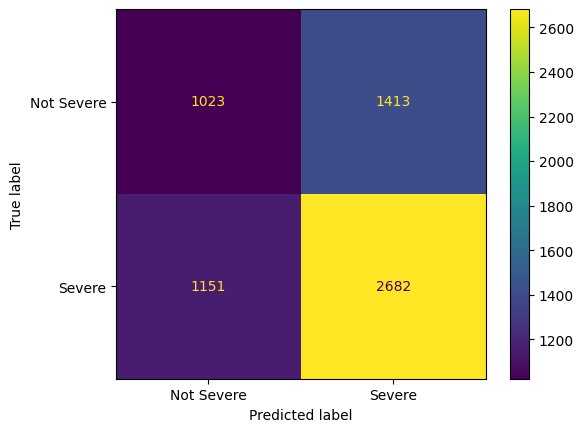

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Severe', 'Severe'])
disp.plot()

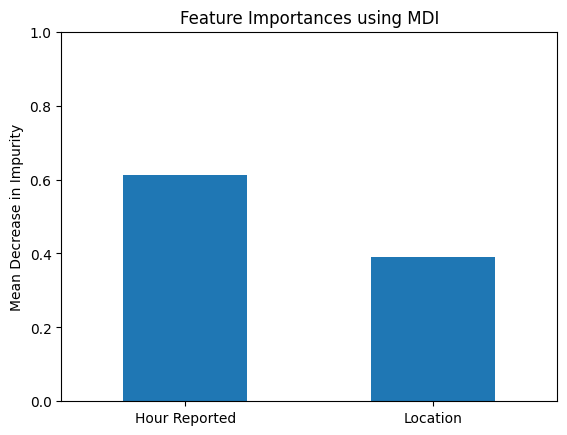

In [ ]:
# feature importances using median decrease in impurity

importances = clf.feature_importances_
combined_importances = [importances[0], importances[1] + importances[2]]
forest_importances = pd.Series(combined_importances, index=['Hour Reported', 'Location'])

fig, ax = plt.subplots()
plt.ylim([0, 1])
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
plt.xticks(rotation=0)
plt.show()

# SVM

(not used in analysis)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
crime_split = crime
crime_split['Severe'] = crime_split['Offense'].map(severity).astype("category")
y = crime_split['Severe']
X = crime_split.drop(['Severe'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.transform(X_test)

In [ ]:
param_grid = [{'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10, 100]}]
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid_search_rbf.fit(X_train_prep, y_train)
grid_search_rbf.best_params_

In [ ]:
# gaussian rbf svm model
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.01)
svm_rbf.fit(X_train_prep, y_train)
pred = svm_rbf.predict(X_test_prep)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
for row in cm:
  print(row)
print()

# precision and recall
tn, fp, fn, tp = cm.ravel()
precision_score = tp / (tp + fp)
print(f"Precision: {precision_score}")
recall_score = tp / (tp + fn)
print(f"Recall: {recall_score}")

In [ ]:
X_test['Pred'] = pred
X_test['Pred'] = X_test['Pred'].astype("category")

In [ ]:
# converting to geodata
geometry = [Point(xy) for xy in zip(X_test.Longitude, X_test.Latitude)]
geodata = X_test.drop(['Longitude', 'Latitude'], axis=1)
geodata = gpd.GeoDataFrame(geodata, crs="EPSG:4326", geometry=geometry)

In [ ]:
# graphing results
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_axis_off()
geodata.plot(ax=ax, column='Pred', marker='o', markersize=10, alpha=0.5, legend=True, cmap='cool')
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Esri.WorldGrayCanvas, attribution_size=4)
plt.show()